# Pós-Graduação FACENS: Introdução IA
## Aula 02 

---

Nome: Mariana Correia Mildemberger
<br>RA: 122741

---

Esta atividade apresentará dois modelos de Machine Learning para dois tipos de predição, um de classificação e outro de regressão linear.

---

## Importando as dependências

In [723]:
#importando pacotes para tratamento de dados
import pandas as pd
import numpy as np

#importando pacotes para visualização de dados
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Dataset escolhido para modelo de classificação

O dataset escolhido visa classificar estrelas de acordo com suas características espectrais.
Fonte: [Kaggle](https://www.kaggle.com/datasets/fedesoriano/stellar-classification-dataset-sdss17?select=star_classification.csv)

obj_ID = Object Identifier, the unique value that identifies the object in the image catalog used by the CAS

alpha = Right Ascension angle (at J2000 epoch)

delta = Declination angle (at J2000 epoch)

u = Ultraviolet filter in the photometric system

g = Green filter in the photometric system

r = Red filter in the photometric system

i = Near Infrared filter in the photometric system

z = Infrared filter in the photometric system

run_ID = Run Number used to identify the specific scan

rereun_ID = Rerun Number to specify how the image was processed

cam_col = Camera column to identify the scanline within the run

field_ID = Field number to identify each field

spec_obj_ID = Unique ID used for optical spectroscopic objects (this means that 2 different observations with the same spec_obj_ID must share the output class)

class = object class (galaxy, star or quasar object)

redshift = redshift value based on the increase in wavelength

plate = plate ID, identifies each plate in SDSS

MJD = Modified Julian Date, used to indicate when a given piece of SDSS data was taken

fiber_ID = fiber ID that identifies the fiber that pointed the light at the focal plane in each observation

## Carregando o dataset

In [724]:
df = pd.read_csv('star_classification.csv')

## Análise exploratória e visualização de dados - EDA / Data Viz

In [725]:
#panorama geral do dataset
df.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


In [726]:
#informações gerais do dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

In [727]:
#estatísticas gerais do dataset
df.describe()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.0,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.237665e+18,177.629117,24.135305,21.980468,20.531387,19.645762,19.084854,18.668810,4481.366060,301.0,3.511610,186.130520,5.783882e+18,0.576661,5137.009660,55588.647500,449.312740
std,8.438560e+12,96.502241,19.644665,31.769291,31.750292,1.854760,1.757895,31.728152,1964.764593,0.0,1.586912,149.011073,3.324016e+18,0.730707,2952.303351,1808.484233,272.498404
min,1.237646e+18,0.005528,-18.785328,-9999.000000,-9999.000000,9.822070,9.469903,-9999.000000,109.000000,301.0,1.000000,11.000000,2.995191e+17,-0.009971,266.000000,51608.000000,1.000000
25%,1.237659e+18,127.518222,5.146771,20.352353,18.965230,18.135828,17.732285,17.460677,3187.000000,301.0,2.000000,82.000000,2.844138e+18,0.054517,2526.000000,54234.000000,221.000000
50%,1.237663e+18,180.900700,23.645922,22.179135,21.099835,20.125290,19.405145,19.004595,4188.000000,301.0,4.000000,146.000000,5.614883e+18,0.424173,4987.000000,55868.500000,433.000000
75%,1.237668e+18,233.895005,39.901550,23.687440,22.123767,21.044785,20.396495,19.921120,5326.000000,301.0,5.000000,241.000000,8.332144e+18,0.704154,7400.250000,56777.000000,645.000000
max,1.237681e+18,359.999810,83.000519,32.781390,31.602240,29.571860,32.141470,29.383740,8162.000000,301.0,6.000000,989.000000,1.412694e+19,7.011245,12547.000000,58932.000000,1000.000000


In [728]:
#analisando a coluna 'rerun_ID' separadamente
df['rerun_ID']

0        301
1        301
2        301
3        301
4        301
        ... 
99995    301
99996    301
99997    301
99998    301
99999    301
Name: rerun_ID, Length: 100000, dtype: int64

In [729]:
df['rerun_ID'].drop_duplicates()

0    301
Name: rerun_ID, dtype: int64

In [730]:
#coluna  'rerunID' não é significante, visto que possui o mesmo valor para todas as linhas.
#deletando a coluna 'rerun_ID'
df.drop(columns=['rerun_ID'], inplace = True)
df.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


In [731]:
#quais tipos de classificação?
df['class'].drop_duplicates()

0    GALAXY
5       QSO
9      STAR
Name: class, dtype: object

In [732]:
#quantos por tipo de classificação?
df['class'].value_counts()

GALAXY    59445
STAR      21594
QSO       18961
Name: class, dtype: int64

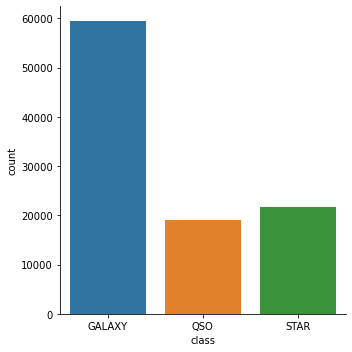

In [733]:
#gráfico de categoria para visualização
sns.catplot(data = df, x = 'class', kind = 'count')

In [734]:
#matriz de correlação
df.corr()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
obj_ID,1.000000,-0.013735,-0.301237,0.015310,0.015710,0.153891,0.147670,0.013811,1.000000,-0.046997,0.031498,0.239461,0.065400,0.239460,0.262687,0.067178
alpha,-0.013735,1.000000,0.138691,-0.001532,-0.002423,-0.022083,-0.023580,-0.002918,-0.013737,0.019582,-0.165577,-0.002553,0.001667,-0.002554,0.019943,0.030464
delta,-0.301237,0.138691,1.000000,0.002074,0.003523,-0.006835,-0.004480,0.003630,-0.301238,0.032565,-0.173416,0.112329,0.031638,0.112329,0.107333,0.028250
u,0.015310,-0.001532,0.002074,1.000000,0.999311,0.054149,0.045730,0.998093,0.015309,0.003548,-0.008374,0.029997,0.014309,0.029997,0.031997,0.016305
g,0.015710,-0.002423,0.003523,0.999311,1.000000,0.062387,0.056271,0.999161,0.015710,0.003508,-0.008852,0.039443,0.022954,0.039443,0.040274,0.017470
r,0.153891,-0.022083,-0.006835,0.054149,0.062387,1.000000,0.962868,0.053677,0.153889,0.008480,-0.026423,0.655245,0.433241,0.655243,0.671180,0.223106
i,0.147670,-0.023580,-0.004480,0.045730,0.056271,0.962868,1.000000,0.055994,0.147668,0.007615,-0.026679,0.661641,0.492383,0.661640,0.672523,0.214787
z,0.013811,-0.002918,0.003630,0.998093,0.999161,0.053677,0.055994,1.000000,0.013811,0.003365,-0.008903,0.037813,0.030380,0.037813,0.037469,0.014668
run_ID,1.000000,-0.013737,-0.301238,0.015309,0.015710,0.153889,0.147668,0.013811,1.000000,-0.047098,0.031498,0.239460,0.065400,0.239459,0.262687,0.067165
cam_col,-0.046997,0.019582,0.032565,0.003548,0.003508,0.008480,0.007615,0.003365,-0.047098,1.000000,-0.015684,-0.001946,0.000097,-0.001949,-0.006745,0.121597


<AxesSubplot:>

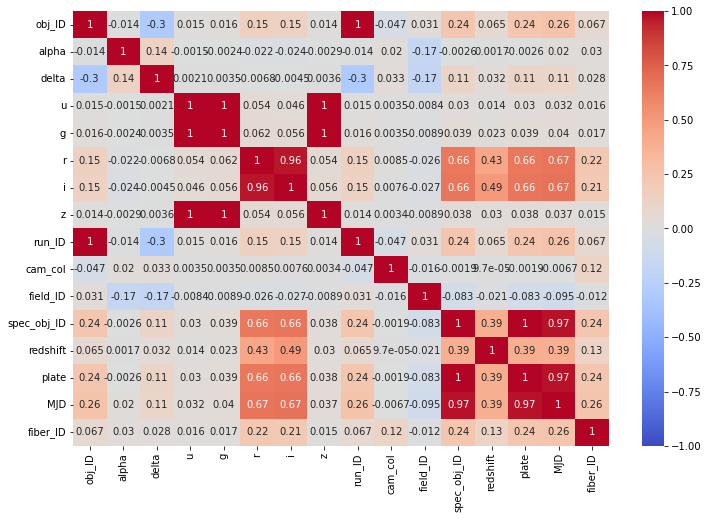

In [735]:
#heatmap da matriz de correlação
plt.figure(figsize = (12,8))
sns.heatmap(data = df.corr(), vmin = -1, vmax = 1, center = 0, annot = True, cmap = 'coolwarm')

## Separando em treino e teste

In [736]:
#separando a classe das outras colunas do dataset
X = df.drop(columns = ['class'])
y = df['class']

In [737]:
#separando teste de treino
from sklearn.model_selection import train_test_split

In [738]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [739]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(67000, 16)
(33000, 16)
(67000,)
(33000,)


## Modelos

In [740]:
#importando os modelos:
#RandomForest
from sklearn.ensemble import RandomForestClassifier

#LogisticRegression
from sklearn.linear_model import LogisticRegression

## Métricas

In [741]:
#importando as métricas matriz de confusão e reporte de classificação
from sklearn.metrics import confusion_matrix, classification_report

## Random Forest - treinamento

In [742]:
#chamando o modelo RandomForest
rf = RandomForestClassifier()

In [743]:
#fitting os dados de treino
rf.fit(X_train, y_train)

RandomForestClassifier()

## Random Forest - prevendo os valores e avaliando os resultados

In [744]:
#prevendo o y considerando o x de teste
y_pred = rf.predict(X_test)

In [745]:
#reporte de classificação
print('Reporte de classificação:\n')
print(classification_report(y_pred, y_test))

Reporte de classificação:

              precision    recall  f1-score   support

      GALAXY       0.99      0.98      0.98     19860
         QSO       0.93      0.96      0.95      5966
        STAR       1.00      0.99      1.00      7174

    accuracy                           0.98     33000
   macro avg       0.97      0.98      0.97     33000
weighted avg       0.98      0.98      0.98     33000



O modelo apresentou 98% de acurácia

In [746]:
#matriz de confusão:
print('matriz de confusão:\n')
print(confusion_matrix(y_pred, y_test))

matriz de confusão:

[[19414   443     3]
 [  212  5754     0]
 [   47     1  7126]]


## Logistic Regression - treinamento

In [747]:
#chamando o modelo Logistic Regresssion
lr = LogisticRegression()

In [748]:
#fitting os dados de treino
lr.fit(X_train,y_train)

LogisticRegression()

## Logistic Regression - prevendo os valores e avaliando os resultados

In [749]:
#prevendo o y_pred em função do X_test
y_pred = lr.predict(X_test)

In [750]:
#reporte de classificação
print('Reporte de classificação:\n')
print(classification_report(y_pred, y_test, zero_division = 1)) #mesmo resultado para zero_division = 0, 1 ou 'warn'

Reporte de classificação:

              precision    recall  f1-score   support

      GALAXY       0.97      0.61      0.75     31385
         QSO       0.12      0.44      0.18      1615
        STAR       0.00      1.00      0.00         0

    accuracy                           0.60     33000
   macro avg       0.36      0.68      0.31     33000
weighted avg       0.93      0.60      0.72     33000



In [751]:
#matriz de confusão:
print('Matriz de confusão:\n')
print(confusion_matrix(y_pred, y_test))

Matriz de confusão:

[[19050  5482  6853]
 [  623   716   276]
 [    0     0     0]]


Não foi possível prever a classificação 'STAR'. A acurácia do modelo ficou em 60%

## Dataset escolhido para modelo de Regressão

O dataset escolhido contém dados de incêndios florestais em duas regiões da Argélia.
Fonte: [UCI](https://archive.ics.uci.edu/ml/datasets/Algerian+Forest+Fires+Dataset++)


Attribute Information:

1. Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012)
Weather data observations
2. Temp : temperature noon (temperature max) in Celsius degrees: 22 to 42
3. RH : Relative Humidity in %: 21 to 90
4. Ws :Wind speed in km/h: 6 to 29
5. Rain: total day in mm: 0 to 16.8
FWI Components
6. Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5
7. Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9
8. Drought Code (DC) index from the FWI system: 7 to 220.4
9. Initial Spread Index (ISI) index from the FWI system: 0 to 18.5
10. Buildup Index (BUI) index from the FWI system: 1.1 to 68
11. Fire Weather Index (FWI) Index: 0 to 31.1
12. Classes: two classes, namely Fire and not Fire

## Carregando o dataset

In [752]:
dfr = pd.read_csv('Algerian_forest_fires_dataset_UPDATE.csv', header = 1) #demorou, mas descobri como puxar o header corretamente

## Tratamento de dataset

In [753]:
#panorama geral do dataset
dfr.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [754]:
dfr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


In [755]:
#nota espaço nas colunas? tipo RH, Ws... deu muito erro na hora de tratar, então fiz um trimm.
dfr.columns = dfr.columns.str.strip()

In [756]:
dfr.info() #funfou

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4   RH           245 non-null    object
 5   Ws           245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


In [757]:
dfr['day'].unique() #coluna mista - assim como todas as outras colunas

array(['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11',
       '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22',
       '23', '24', '25', '26', '27', '28', '29', '30', '31',
       'Sidi-Bel Abbes Region Dataset', 'day'], dtype=object)

In [758]:
#retirar as str e deixar como inteiro
dfr['day'] = pd.to_numeric(dfr['day'], errors = 'coerce').dropna().astype("Int64")

In [759]:
#fazer o mesmo para todas as colunas menos 'Classes'
#Inteiros:'month', 'year', 'Temperature', 'RH', 'Ws'
#Decimais:'Rain', 'FFMC','DMC', 'DC', 'ISI', 'BUI', 'FWI'

dfr['month'] = pd.to_numeric(dfr['month'], errors = 'coerce').dropna().astype("Int64")
dfr['year'] = pd.to_numeric(dfr['year'], errors = 'coerce').dropna().astype("Int64")
dfr['Temperature'] = pd.to_numeric(dfr['Temperature'], errors = 'coerce').dropna().astype("Int64")
dfr['RH'] = pd.to_numeric(dfr['RH'], errors = 'coerce').dropna().astype("Int64")
dfr['Ws'] = pd.to_numeric(dfr['Ws'], errors = 'coerce').dropna().astype("Int64")
dfr['Rain'] = pd.to_numeric(dfr['Rain'], errors = 'coerce').dropna()
dfr['FFMC'] = pd.to_numeric(dfr['FFMC'], errors = 'coerce').dropna()
dfr['DMC'] = pd.to_numeric(dfr['DMC'], errors = 'coerce').dropna()
dfr['DC'] = pd.to_numeric(dfr['DC'], errors = 'coerce').dropna()
dfr['ISI'] = pd.to_numeric(dfr['ISI'], errors = 'coerce').dropna()
dfr['BUI'] = pd.to_numeric(dfr['BUI'], errors = 'coerce').dropna()
dfr['FWI'] = pd.to_numeric(dfr['FWI'], errors = 'coerce').dropna()

#deve ter algum jeito mais fácil de fazer isso, mas não é prioridade agora. Vimos que funcionou né
#segue o baile

In [760]:
dfr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    Int64  
 1   month        244 non-null    Int64  
 2   year         244 non-null    Int64  
 3   Temperature  244 non-null    Int64  
 4   RH           244 non-null    Int64  
 5   Ws           244 non-null    Int64  
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      244 non-null    object 
dtypes: Int64(6), float64(7), object(1)
memory usage: 28.5+ KB


In [761]:
dfr['Classes'].unique() #STR, mas eram para ser somente duas opções.
#Passo a passo para limpar esses dados
#1. trim
#2. remover valor 'Classes'

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       nan, 'Classes  ', 'not fire     ', 'not fire    '], dtype=object)

In [762]:
dfr['Classes'] = dfr['Classes'].str.strip().replace(['Classes'], np.nan)

In [763]:
dfr['Classes'].unique()

array(['not fire', 'fire', nan], dtype=object)

In [764]:
dfr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    Int64  
 1   month        244 non-null    Int64  
 2   year         244 non-null    Int64  
 3   Temperature  244 non-null    Int64  
 4   RH           244 non-null    Int64  
 5   Ws           244 non-null    Int64  
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
dtypes: Int64(6), float64(7), object(1)
memory usage: 28.5+ KB


In [765]:
#muito poucas linhas com na, que eram mais questão de tratamento das colunas. 
#agora, é só jogar fora todos os NAN e uniformizar o DF
dfr = dfr.dropna()

In [766]:
dfr.info() #nice and clean

<class 'pandas.core.frame.DataFrame'>
Int64Index: 243 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    Int64  
 1   month        243 non-null    Int64  
 2   year         243 non-null    Int64  
 3   Temperature  243 non-null    Int64  
 4   RH           243 non-null    Int64  
 5   Ws           243 non-null    Int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
dtypes: Int64(6), float64(7), object(1)
memory usage: 29.9+ KB


## Análise exploratória e visualização de dados - EDA / Data Viz

In [767]:
dfr.head(20) #dataset lindíssimo pra começar

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire
5,6,6,2012,31,67,14,0.0,82.6,5.8,22.2,3.1,7.0,2.5,fire
6,7,6,2012,33,54,13,0.0,88.2,9.9,30.5,6.4,10.9,7.2,fire
7,8,6,2012,30,73,15,0.0,86.6,12.1,38.3,5.6,13.5,7.1,fire
8,9,6,2012,25,88,13,0.2,52.9,7.9,38.8,0.4,10.5,0.3,not fire
9,10,6,2012,28,79,12,0.0,73.2,9.5,46.3,1.3,12.6,0.9,not fire


In [768]:
dfr.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
count,243.000000,243.000000,243.0,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,15.761317,7.502058,2012.0,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391
std,8.842552,1.114793,0.0,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000
75%,23.000000,8.000000,2012.0,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000


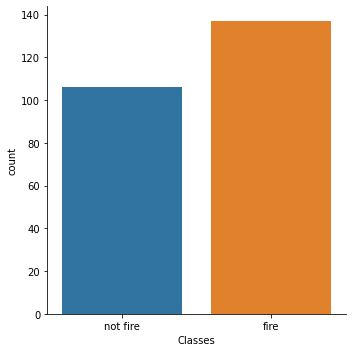

In [769]:
#gráfico de categoria para visualização
sns.catplot(data = dfr, x = 'Classes', kind = 'count')

Como notamos, as medições foram feitas entre junho e setembro de 2012 e tivemos mais dias com incêndio do que sem

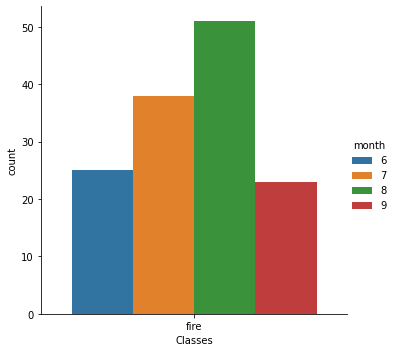

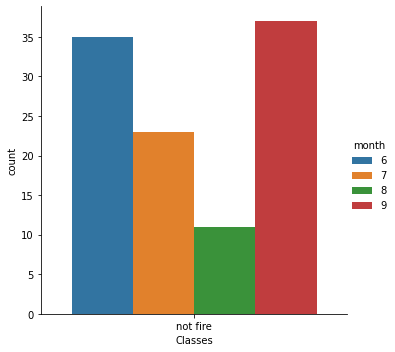

In [770]:
#descobrindo quais meses tivemos maior incidencia de incendios x menor incidencia
sns.catplot(data = dfr[dfr['Classes'] == 'fire'], x = 'Classes', kind = 'count', hue = 'month')


#comparando com os meses que menos tiveram incendios
sns.catplot(data = dfr[dfr['Classes'] == 'not fire'], x = 'Classes', kind = 'count', hue = 'month')

Podemos observar que o mês com maior incidencia de incêndios foi em agosto, e o de menor incidencia de incêncios foi em setembro

In [771]:
#dicionario com os nomes dos meses
meses = {
    6 : 'Junho',
    7 : 'Julho',
    8 : 'Agosto',
    9 : 'Setembro'
}

#dfr agrupado por mes
dfr_per_month = dfr.groupby('month')

#média da temperatura dos dias por mês
media_temp_mes = dfr_per_month['Temperature'].mean().round(2)

#média da umidade dos dias por mês
media_umid_mes = dfr_per_month['RH'].mean().round(2)

#dias com incendio
dias_fire = dfr['month'][dfr['Classes'] == 'fire'].value_counts()

#dias sem incêndio
dias_not_fire = dfr['month'][dfr['Classes'] == 'not fire'].value_counts()

#Dataframe com temperatura e umidade média por mês:

tem_umi_med_data = {
    'Mês' : meses,
    'Temperatura Média' : media_temp_mes,
    'Umidade Média' : media_umid_mes,
    'Incêndio' : dias_fire,
    'Sem incêndio' : dias_not_fire
}

pd.DataFrame(data=tem_umi_med_data)

,Mês,Temperatura Média,Umidade Média,Incêndio,Sem incêndio
6,Junho,30.8,65.28,25,35
7,Julho,32.98,62.7,38,23
8,Agosto,35.34,53.98,51,11
9,Setembro,29.37,66.45,23,37


Agosto possui o maior numero de alertas de incêncio, sendo o mês mais quente e menos úmido.

<AxesSubplot:>

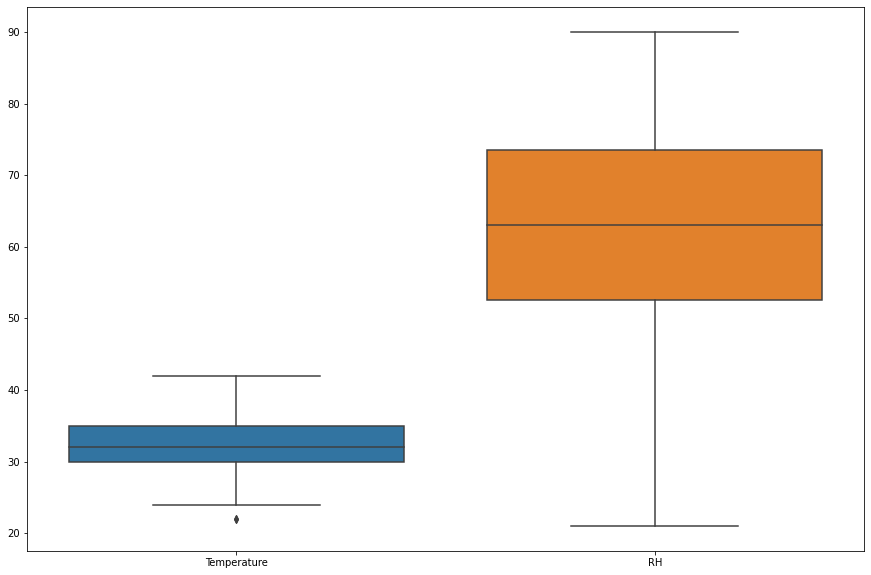

In [772]:
#boxplot para temp e umidade
plt.figure(figsize=(15,10))
sns.boxplot(data = dfr[['Temperature','RH']])

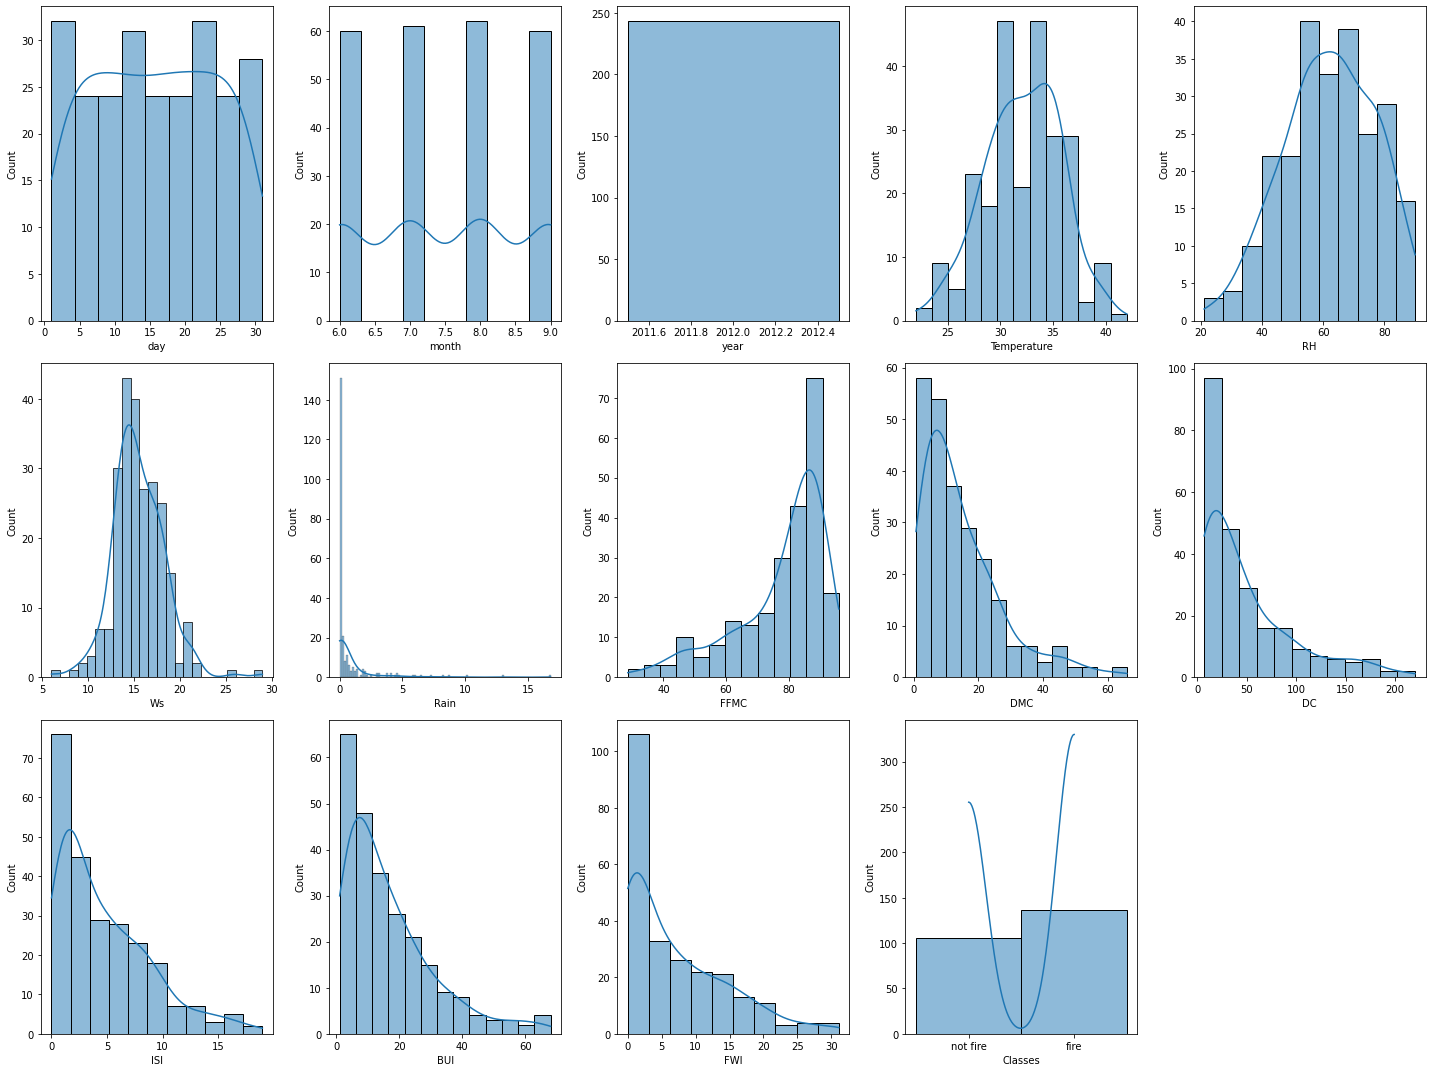

In [773]:
#distribuição dos dados por histograma
plt.figure(figsize=(20, 15))
i = 1

for columns in dfr:
    if i <= 14:
        ax = plt.subplot(3,5,i)
        sns.histplot(dfr[columns], kde=True)
        plt.xlabel(columns)
        
    i += 1

plt.tight_layout()

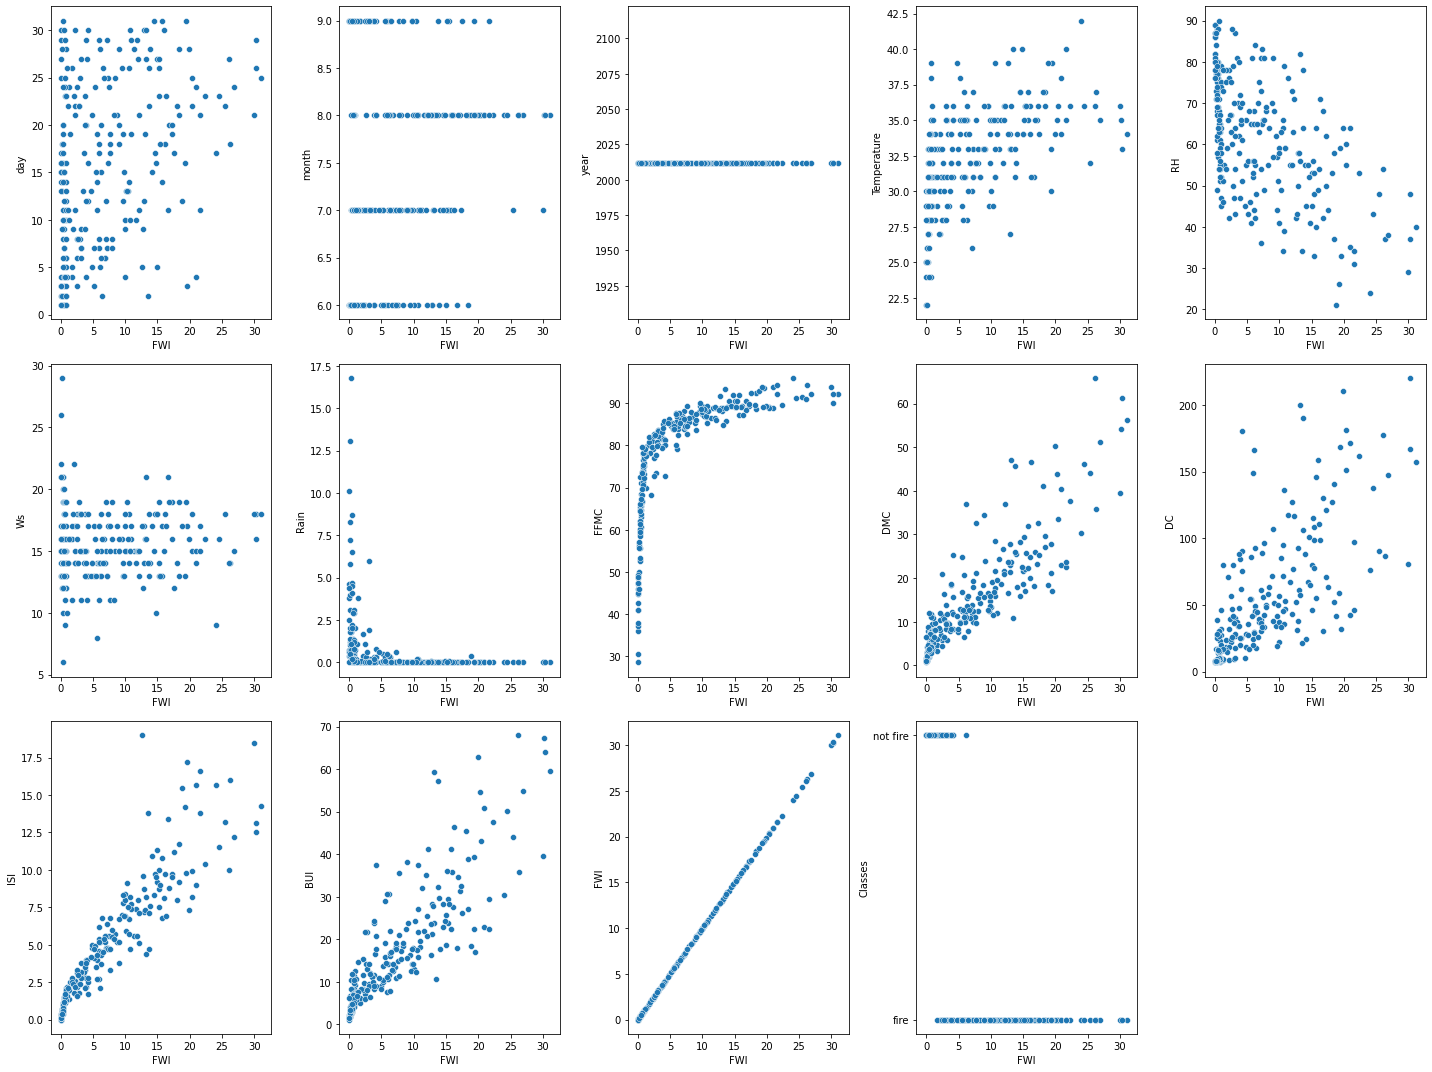

In [774]:
#gráfico de distribuição sendo x BUI

plt.figure(figsize=(20, 15))
i = 1

for columns in dfr:
    if i <= 14:
        ax = plt.subplot(3,5,i)
        sns.scatterplot(data=dfr, x='FWI', y=columns)
        plt.xlabel('FWI')
        
    i += 1

plt.tight_layout()

<AxesSubplot:>

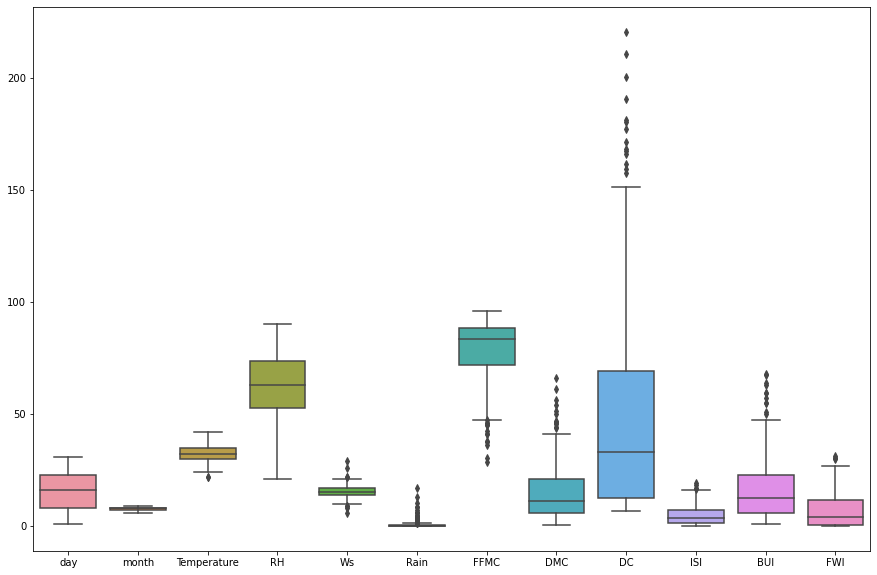

In [775]:
#boxplot para as colunas
plt.figure(figsize=(15,10))
sns.boxplot(data = dfr.drop(columns = 'year'))

In [776]:
#matriz de correlação tirando o ano, uma vez que é valor único
dfr.drop(columns = 'year').corr()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
day,1.000000,-0.000369,0.097227,-0.076034,0.047812,-0.112523,0.224956,0.491514,0.527952,0.180543,0.517117,0.350781
month,-0.000369,1.000000,-0.056781,-0.041252,-0.039880,0.034822,0.017030,0.067943,0.126511,0.065608,0.085073,0.082639
Temperature,0.097227,-0.056781,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670
RH,-0.076034,-0.041252,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957
Ws,0.047812,-0.039880,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368
Rain,-0.112523,0.034822,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422
FFMC,0.224956,0.017030,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132
DMC,0.491514,0.067943,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864
DC,0.527952,0.126511,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521
ISI,0.180543,0.065608,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895


<AxesSubplot:>

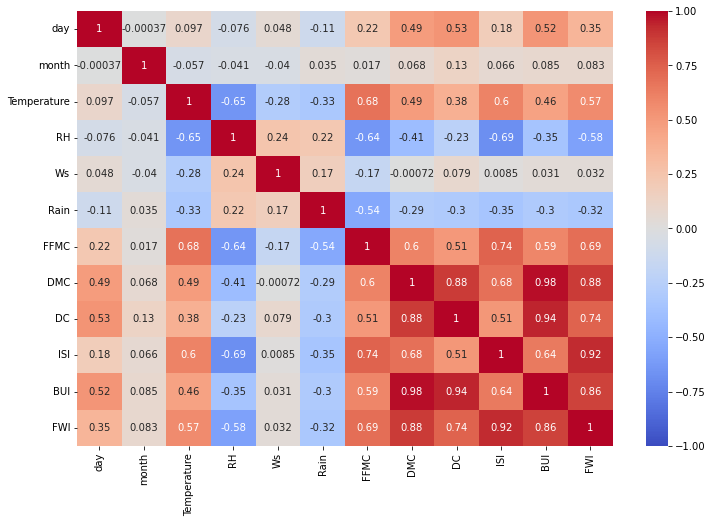

In [777]:
#heatmap da matriz de correlação
plt.figure(figsize = (12,8))
sns.heatmap(data = dfr.drop(columns = 'year').corr(), vmin = -1, vmax = 1, center = 0, annot = True, cmap = 'coolwarm')

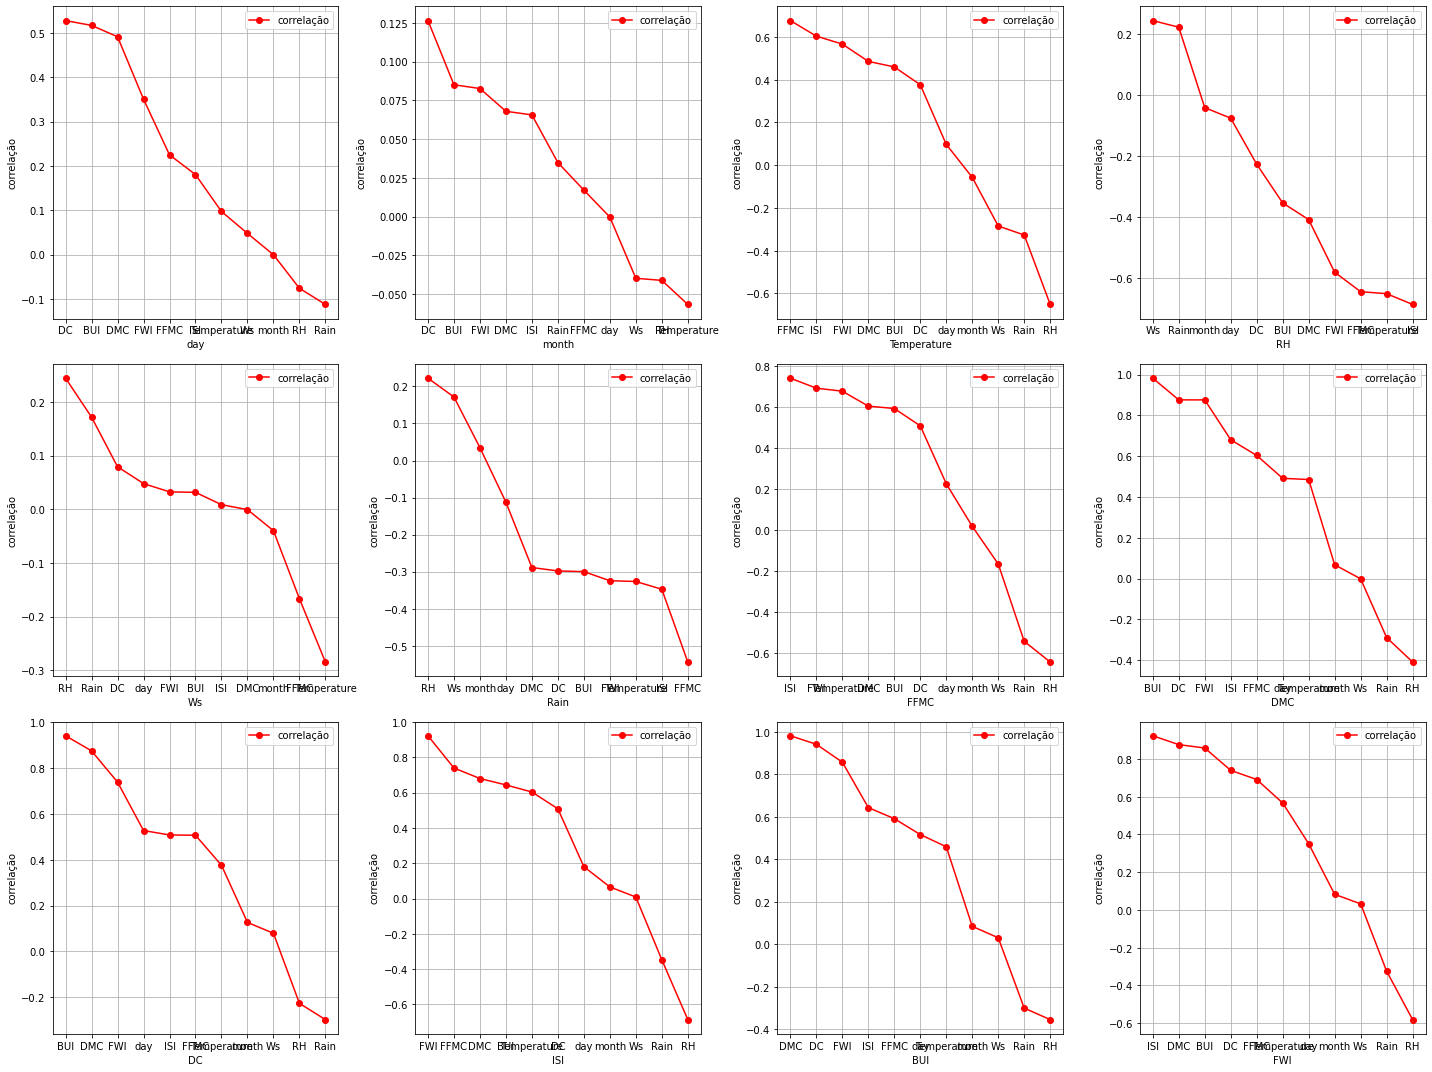

In [778]:
#Correlação
plt.figure(figsize=(20, 15))
i = 1
corr = dfr.drop(columns = 'year').corr()

for columns in corr:
    if i <= 14:
        ax = plt.subplot(3,4,i)
        plt.plot(corr[columns].sort_values(ascending=False)[1:], 
                label='correlação', 
                color='r', 
         marker='o')
        plt.ylabel('correlação')
        plt.xlabel(columns)
        plt.legend()
        plt.grid(True)
    i += 1

plt.tight_layout()

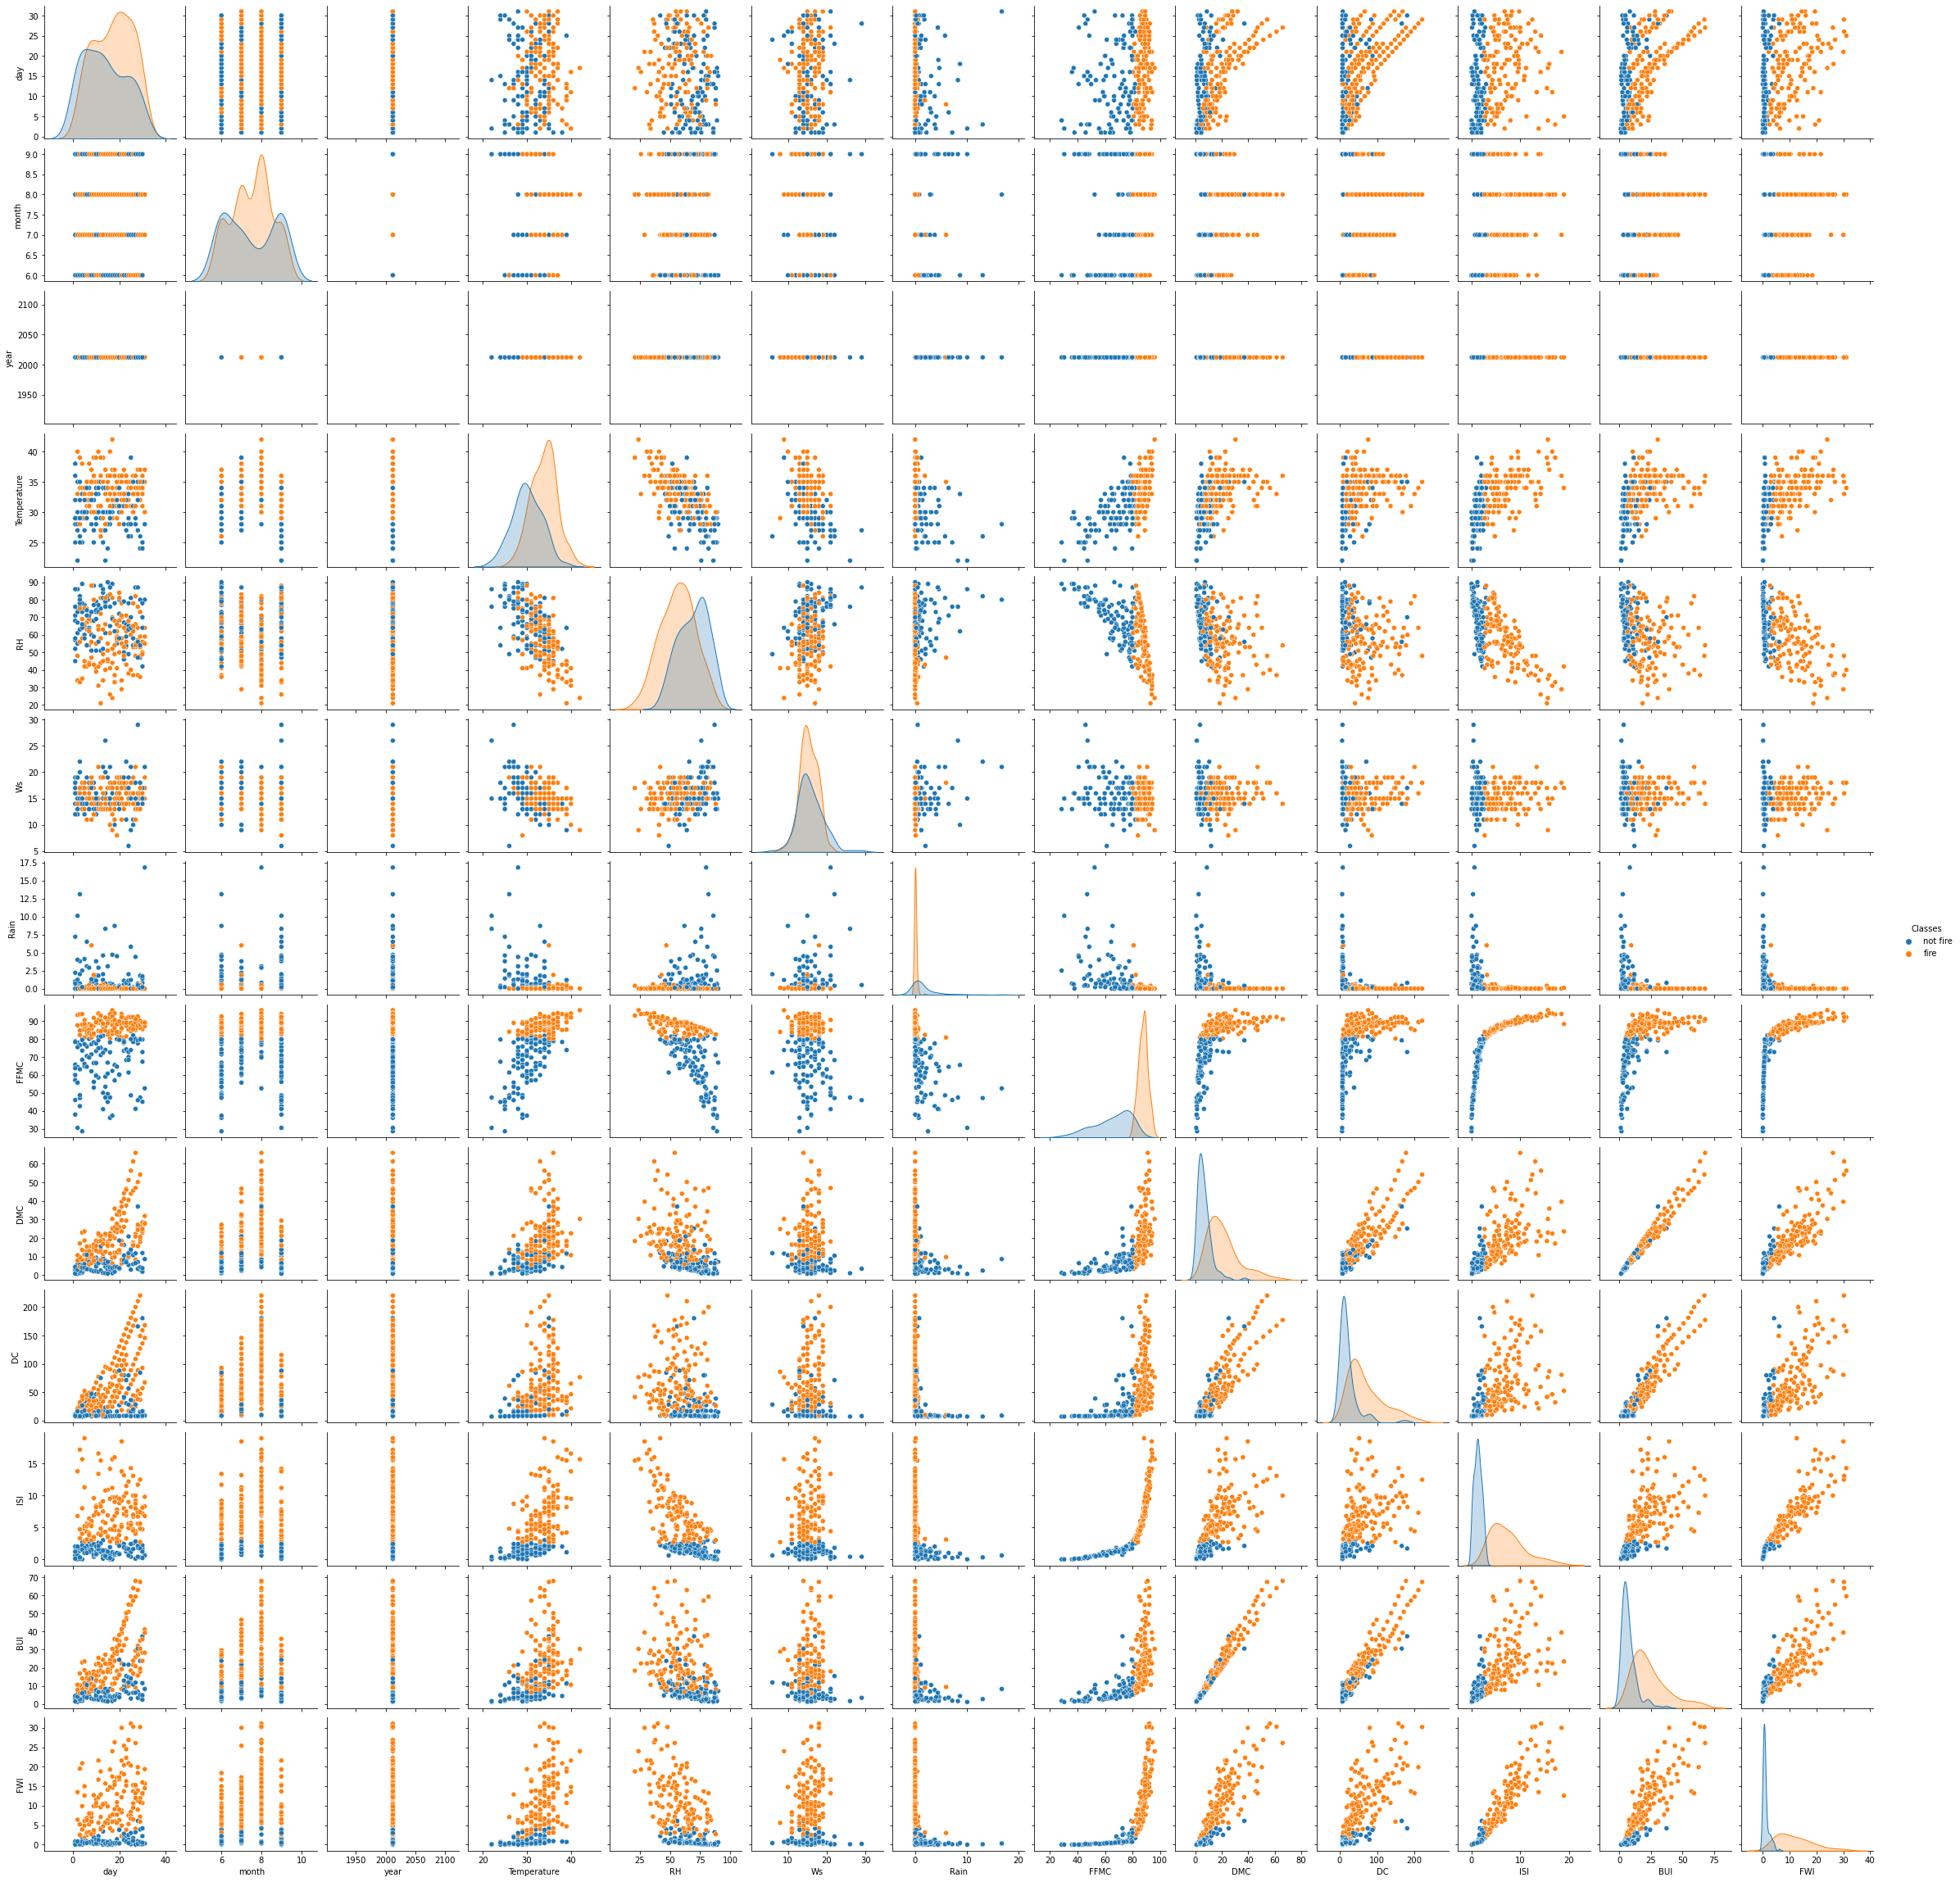

In [779]:
#pairplot do data frame, veja que em vários há distinta difwrença entre dias com incendio e sem incendio
sns.pairplot(data = dfr, hue = 'Classes')

## Separando em treino e teste

In [780]:
from sklearn.model_selection import train_test_split

In [781]:
dfr1 = dfr.drop('Classes', axis=1) #tirando a coluna categórica
dfr1

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5
242,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0
243,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2
244,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7


In [782]:
X = dfr1.drop('FWI', axis=1)
y = dfr1['FWI']

In [783]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [784]:
for i in X_train, y_train, X_test, y_test:
    print(i.shape)

(162, 12)
(162,)
(81, 12)
(81,)


## Treinando o modelo de Regressão Linear

In [785]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [786]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

## Prevendo os valores e avaliando os resultados - Regressão Linear

In [787]:
y_pred = lr.predict(X_test)

In [788]:
print('r2 score: {:.2f}'.format(r2_score(y_test, y_pred)))
print('MAE: {:.2f}'.format(mean_absolute_error(y_test, y_pred)))
print('MSE: {:.2f}'.format(mean_squared_error(y_test, y_pred)))
print('RMSE: {:.2f}'.format(np.sqrt(mean_squared_error(y_test, y_pred))))

r2 score: 0.94
MAE: 0.62
MSE: 3.16
RMSE: 1.78


<AxesSubplot:xlabel='FWI'>

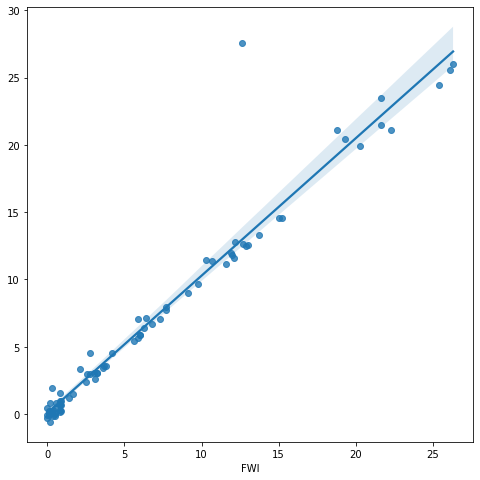

In [789]:
plt.figure(figsize=(8,8))
sns.regplot(x=y_test, y=y_pred) #LINDOOOOOOOO

## Calculando os features mais significativos para o modelo de Regressão Linear

In [791]:
importance = lr.coef_

In [792]:
for i,v in enumerate(importance):
    print('Feature: {}, Score: {:.5f}'.format(i,v))

Feature: 0, Score: 0.00568
Feature: 1, Score: 0.01354
Feature: 2, Score: 0.00000
Feature: 3, Score: -0.03069
Feature: 4, Score: 0.00236
Feature: 5, Score: -0.00761
Feature: 6, Score: 0.03780
Feature: 7, Score: -0.06286
Feature: 8, Score: 0.01031
Feature: 9, Score: -0.00361
Feature: 10, Score: 1.37813
Feature: 11, Score: 0.23536


<BarContainer object of 12 artists>

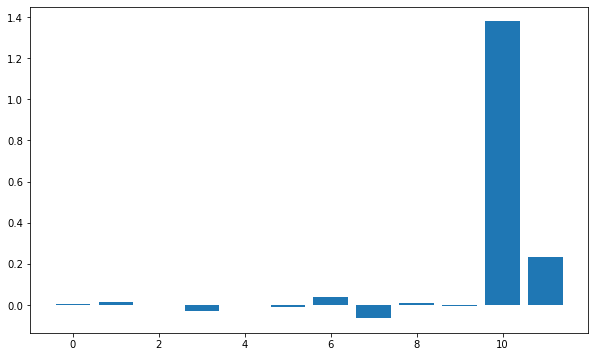

In [793]:
plt.figure(figsize=(10,6))
plt.bar([x for x in range(len(importance))], importance)

## Treinando o modelo de K-Nearest Neighbors (KNN)

In [794]:
knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

## Prevendo os valores e avaliando os resultados - K-Nearest Neighbors (KNN)

In [795]:
y_pred = knn.predict(X_test)

In [796]:
print('r2 score: {:.2f}'.format(r2_score(y_test, y_pred)))
print('MAE: {:.2f}'.format(mean_absolute_error(y_test, y_pred)))
print('MSE: {:.2f}'.format(mean_squared_error(y_test, y_pred)))
print('RMSE: {:.2f}'.format(np.sqrt(mean_squared_error(y_test, y_pred))))

r2 score: 0.88
MAE: 1.52
MSE: 6.11
RMSE: 2.47


## Encontrando o melhor valor de K pelo método gráfico

In [798]:
rmse = []

for i in range(1,20):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    rmse.append(np.sqrt(mean_squared_error(y_test, pred_i)))

In [799]:
x = {'k': range(1,20), 'rmse': rmse}
df = pd.DataFrame(x)

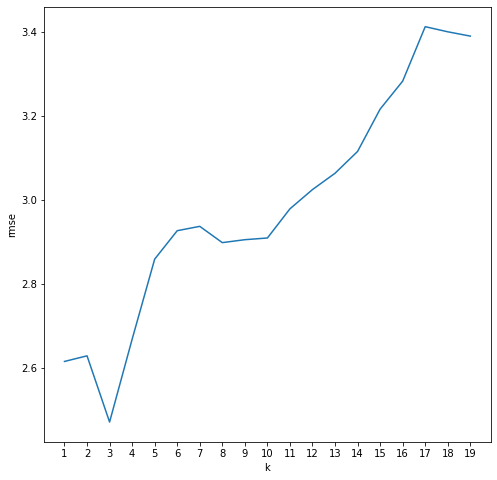

In [800]:
plt.figure(figsize=(8,8))
g = sns.lineplot(data=df, x='k',y='rmse')

g.set_xticks(range(1,20))

In [801]:
df.iloc[df['rmse'].idxmin(),:]

k       3.000000
rmse    2.471495
Name: 2, dtype: float64

## Encontrando o melhor valor de K pelo Grid Search Cross Validation

In [802]:
from sklearn.model_selection import GridSearchCV

In [803]:
param = {'n_neighbors':[1,2,3,4,5,7,10,15]}

In [804]:
from sklearn import metrics
metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

In [805]:
knn = KNeighborsRegressor()
knn_grid = GridSearchCV(knn, param, cv=4, scoring='r2')
knn_grid.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 7, 10, 15]},
             scoring='r2')

In [806]:
pd.DataFrame(knn_grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003584,0.001559,0.002646,0.000709,1,{'n_neighbors': 1},0.897020,0.853282,0.748836,0.911080,0.852555,0.063562,3
1,0.003037,0.001207,0.002441,0.001440,2,{'n_neighbors': 2},0.874421,0.913153,0.737347,0.887962,0.853221,0.068329,2
2,0.004060,0.001258,0.002949,0.000736,3,{'n_neighbors': 3},0.874516,0.906251,0.818085,0.889137,0.871997,0.033091,1
3,0.004127,0.001410,0.004048,0.001275,4,{'n_neighbors': 4},0.811218,0.879781,0.796156,0.844782,0.832984,0.032246,4
4,0.002500,0.000547,0.002711,0.000794,5,{'n_neighbors': 5},0.793801,0.870918,0.805390,0.814912,0.821255,0.029631,5
5,0.002751,0.000838,0.002468,0.000836,7,{'n_neighbors': 7},0.741381,0.810558,0.718546,0.808896,0.769845,0.040695,6
6,0.002491,0.000863,0.001495,0.000498,10,{'n_neighbors': 10},0.735725,0.757827,0.672016,0.787441,0.738252,0.042415,7
7,0.002490,0.000497,0.001875,0.000206,15,{'n_neighbors': 15},0.727231,0.716641,0.702214,0.768903,0.728747,0.024826,8


In [807]:
print('Melhor valor de K: {}'.format(knn_grid.best_params_))
print('Score do melhor valor de K: {:.2f}'.format(knn_grid.best_score_))

Melhor valor de K: {'n_neighbors': 3}
Score do melhor valor de K: 0.87


## Treinando o modelo de Florestas Aleatórias (Random Forest Regression)

In [808]:
rf = RandomForestRegressor(max_depth=10, n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, random_state=42)

## Prevendo os valores e avaliando os resultados - Random Forest Regression

In [809]:
y_pred = rf.predict(X_test)

In [810]:
print('r2 score: {:.2f}'.format(r2_score(y_test, y_pred)))
print('MAE: {:.2f}'.format(mean_absolute_error(y_test, y_pred)))
print('MSE: {:.2f}'.format(mean_squared_error(y_test, y_pred)))
print('RMSE: {:.2f}'.format(np.sqrt(mean_squared_error(y_test, y_pred))))

r2 score: 0.98
MAE: 0.63
MSE: 1.25
RMSE: 1.12


## Calculando os features mais significativos para o modelo de Random Forest Regression

In [811]:
importance = rf.feature_importances_

In [812]:
for i,v in enumerate(importance):
    print('Feature: {}, Score: {:.5f}'.format(i,v))

Feature: 0, Score: 0.00272
Feature: 1, Score: 0.00074
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00226
Feature: 4, Score: 0.00454
Feature: 5, Score: 0.00248
Feature: 6, Score: 0.00018
Feature: 7, Score: 0.21087
Feature: 8, Score: 0.07380
Feature: 9, Score: 0.01577
Feature: 10, Score: 0.64729
Feature: 11, Score: 0.03936


<BarContainer object of 12 artists>

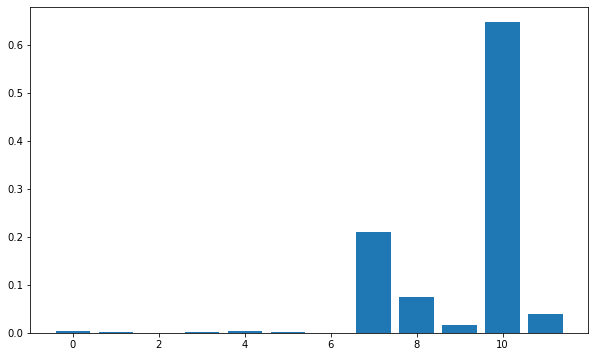

In [813]:
plt.figure(figsize=(10,6))
plt.bar([x for x in range(len(importance))], importance)